In [ ]:
import sys, os, pathlib
sys.path.append("/root/shared/gitrepos/smart-comp-sci/utils")
import smart_analysis
from matplotlib import pyplot as plt
import numpy as np
plt.style.use(str(pathlib.Path.cwd() / ".." / "utils" / "smart_plots.mplstyle"))

The following script is used to analyze average values for each variable in the dendritic spine model over time. Three domains are considered, as specified by box regions - spine head, spine neck, and dendritic shaft. Change paths as necessary.

In [ ]:
results_folder = "/root/scratch/smart-comp-sci-data/dendritic_spine/results1"
spine_mesh = "/root/scratch/smart-comp-sci-data/dendritic_spine/mesh/1spine.h5"
tests = ["spine-all", "spine-head", "spine-neck", "spine-shaft"]
spine_head = [-1000,-1000,0.2,1000,1000,1000]
spine_neck = [0, -1000, -0.4, 1000, 1000, 0.2]
spine_shaft = [-1000,-1000,-1000,1000,1000,-0.4]
domains = [[], spine_head, spine_neck, spine_shaft]
for i in range(len(tests)):
    npy_dir = pathlib.Path.cwd() / ".." / "analysis_data" / "dendritic-spine" / "dendritic_spine_npy_files"
    npy_dir.mkdir(exist_ok=True)

    tVec, results_all = smart_analysis.analyze_all(
        mesh_file=spine_mesh, results_path=results_folder, display=False,
        subdomain=domains[i])
    results_all.insert(0, tVec) # add time as first element in list
    max_length = len(tVec)
    for j in range(len(results_all)):
        if len(results_all[j]) > max_length:
            max_length = len(results_all[j])
    for j in range(len(results_all)):
        num_zeros = max_length - len(results_all[j])
        for k in range(num_zeros):
            results_all[j].append(0)
    np.save(npy_dir / f"{tests[i]}.npy", results_all)

Plot results in dendritic spine head vs. shaft for calcium in the cytosol and spine apparatus (Fig 4D).

In [ ]:
spine_vars = ["Bf", "Bm", "Ca", "CaSA", "NMDAR"]

npy_dir = pathlib.Path.cwd() / ".." / "analysis_data" / "dendritic-spine" / "dendritic_spine_npy_files"
spine_files = [f"{npy_dir}/spine-head-results.npy", 
               f"{npy_dir}/spine-shaft-results.npy"]

f, (ax1, ax2) = plt.subplots(2, 1, sharex=False)

for i in range(len(spine_files)):
    results_spine = np.load(spine_files[i])
    plot_spine1 = "Ca"

    spine_idx1 = spine_vars.index(plot_spine1) + 1
    ax1.plot(results_spine[0], results_spine[spine_idx1],label="Dendritic spine")
    ax1.set_ylim([0, 5])
    # ax1.legend()
    ax1.set_ylabel("Calcium (μM)")

    plot_spine2 = "CaSA"
    spine_idx2 = spine_vars.index(plot_spine2) + 1
    ax2.plot(results_spine[0], results_spine[spine_idx2],'r',label="Dendritic spine")
    # ax2.legend()
    ax2.set_ylabel("SA calcium (μM)")
    ax2.set_ylim([60, 69])
    ax2.set_xlabel("Time (s)")
plt.savefig(f"{str(npy_dir)}/spine_both_plots.pdf", format="pdf")

Plot results from mesh refinement, comparing maximum calcium in the spine head vs. the neck, vs. shaft. (Figure 6E)

In [ ]:
import postprocess, json
results_folder = pathlib.Path.cwd() / ".." / "analysis_data" / "dendritic-spine" / "dendritic-spine-spatial"
output_folder = results_folder / "output"
output_folder.mkdir(exist_ok=True, parents=True)
results_file = output_folder / "results_dendritic_spine.json"

print(f"Gather results from {results_folder}")
all_results = postprocess.load_all_data(results_folder)
print(f"Save results to {results_file.absolute()}")
results_file.write_text(
    json.dumps([r.to_json() for r in all_results], indent=4)
)
spine_head = [-1000,-1000,0.2,1000,1000,1000]
spine_neck = [0, -1000, -0.4, 1000, 1000, 0.2]
spine_shaft = [-1000,-1000,-1000,1000,1000,-0.4]
domains = [spine_head, spine_neck, spine_shaft]
postprocess.plot_linf_error(all_results, output_folder, format=".pdf", subdomains=domains)

Plot results from mesh refinement and time step refinement for suppl figure.

In [ ]:
import postprocess, json
results_folder = pathlib.Path.cwd() / ".." / "analysis_data" / "dendritic-spine" / "dendritic-spine-refinement"
results_file = results_folder / "results_dendritic_spine.json"
output_folder = results_folder / "output"
output_folder.mkdir(exist_ok=True, parents=True)
all_results = [postprocess.Data(**r) for r in json.loads(results_file.read_text())]
postprocess.plot_refinement_study(all_results, output_folder, format="pdf")

Plot timings from dendritic spine runs.

KSPSolve [  21  147 1618] [0 0 0]
SNESJacobianEval [  48  325 2845] [0 0 0]
SNESFunctionEval [  153  1220 13111] [0 0 0]
[0.00554211 0.00840902]
Percentage of total time (assembly)
('standard: ', 0.8739783744444154)
('fine', 0.8835218156469271)
('extra fine', 0.8689367070226708)
Percentage of total time (KSP)
standard 0.09467817257124042
fine:  0.08452128996868785
extra fine:  0.08812317354291835
Setup time
standard:  0.02259125447283376
fine:  0.025793774141201747
extra fine:  0.03821120650536366


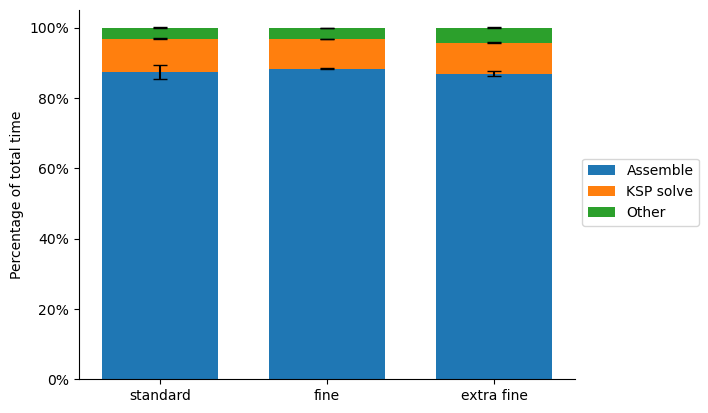

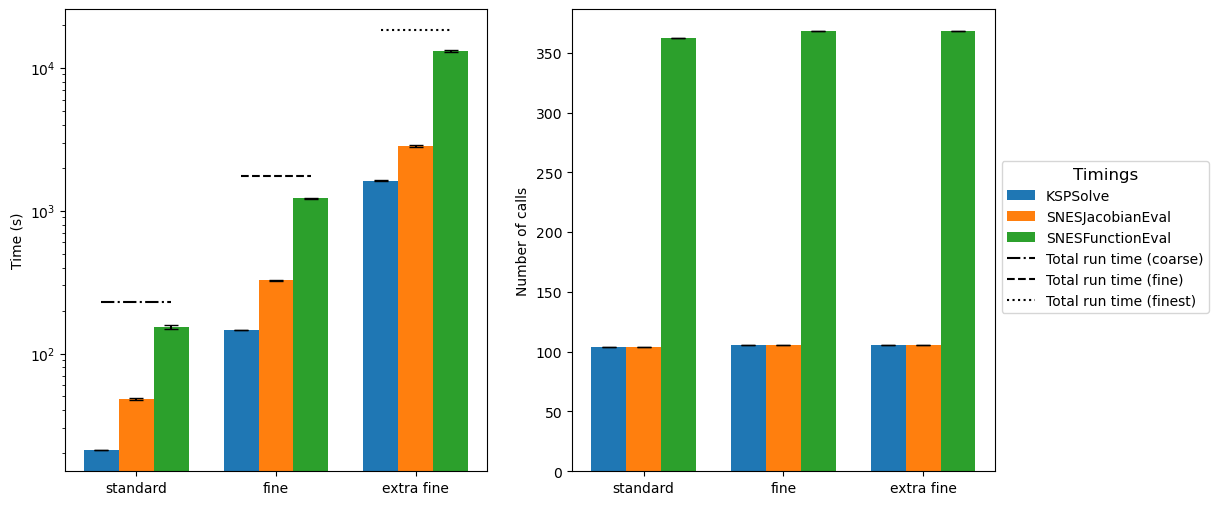

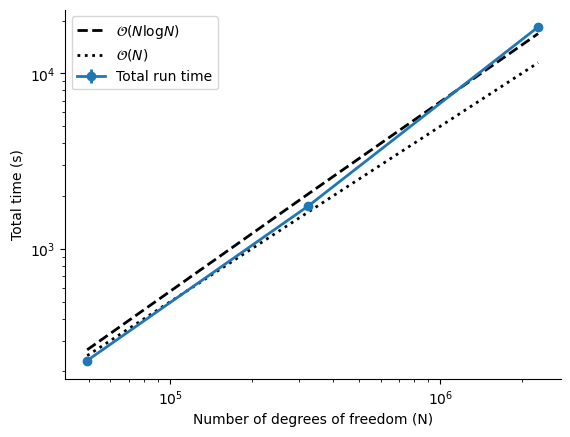

In [3]:
import postprocess, json, pathlib
output_folder = pathlib.Path.cwd() / ".." / "analysis_data" / "dendritic-spine" / "dendritic-spine-timings"
results_file = output_folder / "results_dendritic_spine.json"
json_data = json.loads(results_file.read_text())
for i in range(len(json_data)):
    json_data[i]["petsc_timings_"] = json_data[i].pop("petsc_timings")
all_results = [postprocess.Data(**r) for r in json_data]
postprocess.plot_timings_stacked(all_results, output_folder, format="pdf")
postprocess.plot_timings(all_results, output_folder, format="pdf")